In [1]:
from grey_model import GreyModel
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

# Set font sizes
plt.rcParams.update({'font.size': 14})  # Default font size
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

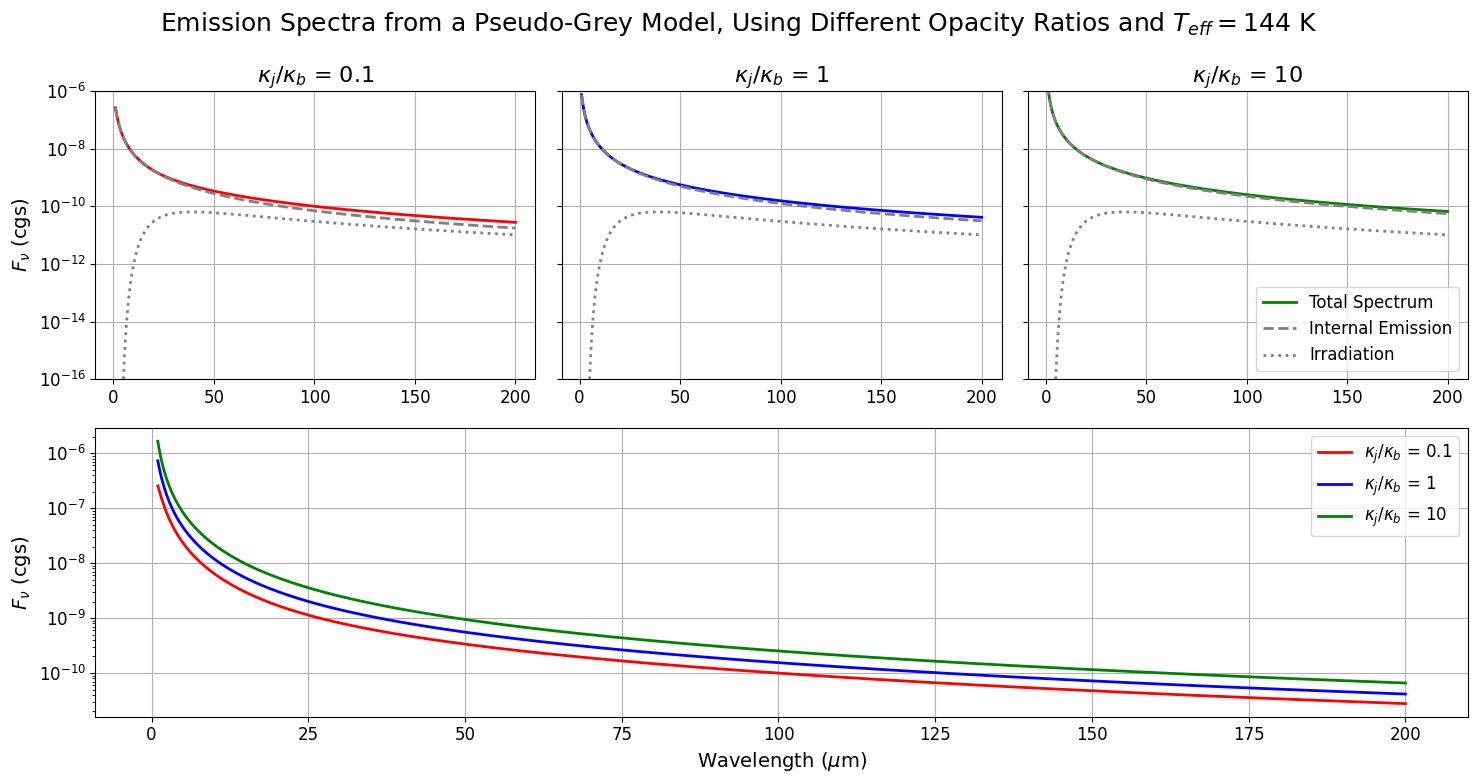

In [17]:
kappa_ratios = [0.1, 1, 10]
cols = ['r', 'b', 'g']
fig = plt.figure(figsize=(15, 8))

# Create grid: 2 rows, 3 columns with shared y-axis for top row
# Top row: 3 individual plots with shared y-axis
axes_top = []
for i in range(3):
    if i == 0:
        ax = plt.subplot(2, 3, i+1)
        axes_top.append(ax)
    else:
        ax = plt.subplot(2, 3, i+1, sharey=axes_top[0])
        axes_top.append(ax)

# Bottom row: 1 plot spanning all 3 columns
ax_bottom = plt.subplot(2, 1, 2)

# Store data for the bottom plot
total_spectra = []
wavelengths = None

for i, kappa_ratio in enumerate(kappa_ratios):
    model = GreyModel(kappa_ratio=kappa_ratio, D=1e8, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Store for bottom plot
    total_spectra.append(spec)
    if wavelengths is None:
        wavelengths = wavelength
    
    # Top row individual plots
    axes_top[i].semilogy(wavelength, spec, cols[i], linewidth=2, label='Total Spectrum')
    axes_top[i].semilogy(wavelength, local, 'gray', linewidth=2, label='Internal Emission', linestyle='--')
    axes_top[i].semilogy(wavelength, irr, 'gray', linewidth=2, label='Irradiation', linestyle=':')
    axes_top[i].set_title(f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}', fontsize=title_fontsize)
    axes_top[i].grid()
    axes_top[i].set_ylim(10**-16, 10**-6)
    axes_top[i].tick_params(axis='x', which='major', labelsize=12)
    
    # Only show y-axis label and tick labels on the leftmost plot
    if i == 0:
        axes_top[i].set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
        axes_top[i].tick_params(axis='y', which='major', labelsize=12)
    else:
        # Hide y-axis tick labels for middle and right plots
        axes_top[i].tick_params(axis='y', which='major', labelleft=False)

# Bottom plot: all total spectra together
colors = ['red', 'blue', 'green']
for i, (kappa_ratio, spec) in enumerate(zip(kappa_ratios, total_spectra)):
    ax_bottom.semilogy(wavelengths, spec, color=colors[i], linewidth=2, 
                      label=f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}')

ax_bottom.set_xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
ax_bottom.set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
ax_bottom.legend(fontsize=legend_fontsize)
ax_bottom.grid()
ax_bottom.tick_params(axis='both', which='major', labelsize=12)

# Add legend only to the last top plot
axes_top[2].legend(loc='lower right', fontsize=legend_fontsize)

fig.suptitle('Emission Spectra from a Pseudo-Grey Model, Using Different Opacity Ratios and $T_{eff}=144$ K', fontsize=18)
plt.tight_layout()
#plt.savefig('figures/spectrum_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

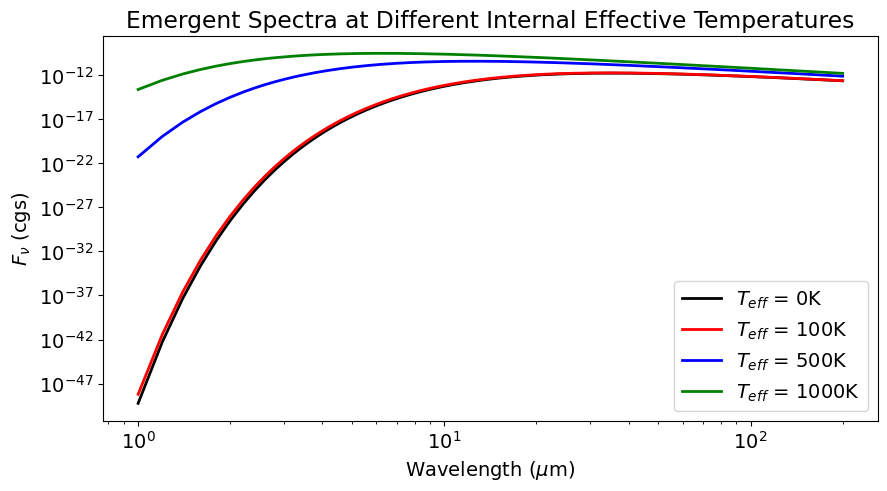

In [34]:
temperatures = [0, 100, 500, 1000]
cols = ['k', 'r', 'b', 'g']
plt.figure(figsize=(10,5))

for i, t in enumerate(temperatures):
    model = GreyModel(Teff=t, kappa_ratio=1, D=1e12, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Top row individual plots
    plt.loglog(wavelength, spec, color=cols[i], linewidth=2, label=f'$T_{{eff}}$ = {t}K')
    #plt.xlim(0,50)
    plt.legend()
    plt.title('Emergent Spectra at Different Internal Effective Temperatures')
    plt.xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
    plt.ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)

[Abundances] T=811.1984955483748 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1987616260133 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1992292596556 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.2000511287905 KK, P=9.78e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundan

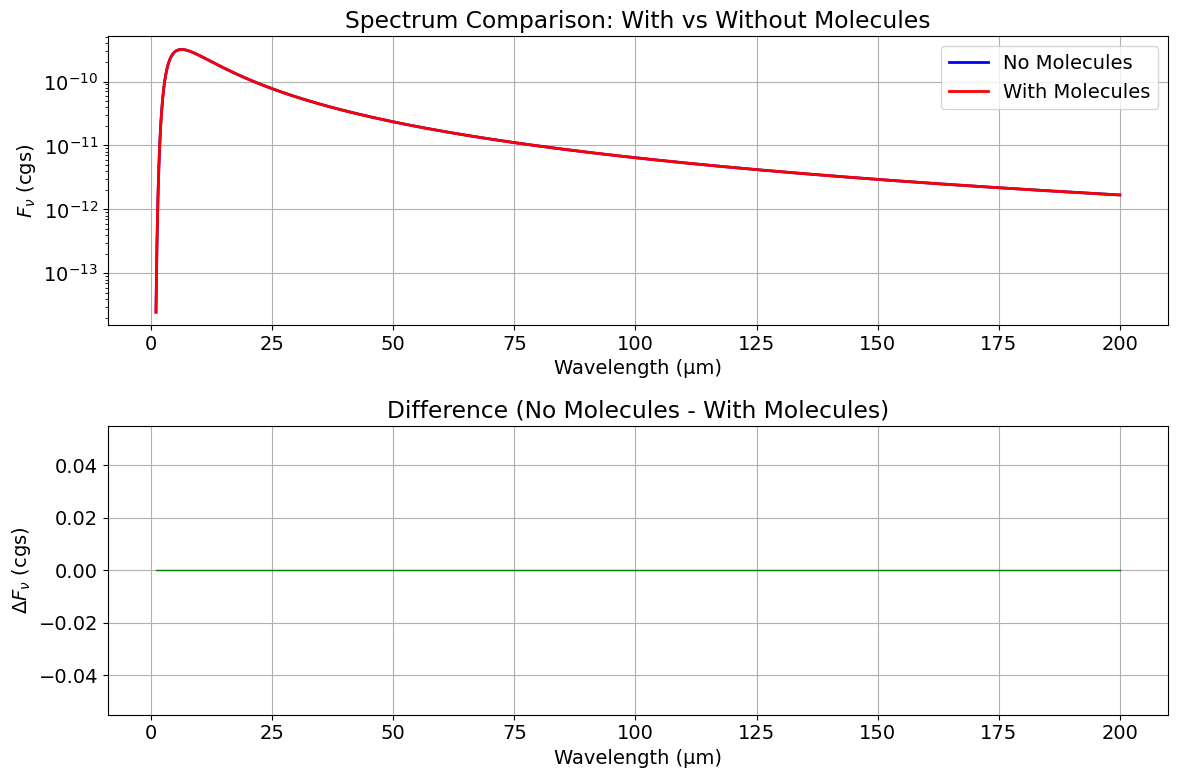

Max continuum flux: 3.18e-10 Hz3 s3 J / m2
[Abundances] T=811.1984955483748 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1987616260133 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1992292596556 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.2000511287905 KK, P=9.78e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 

In [5]:
# Replace your current cell with this debugging version
model_no_mol = GreyModel(Teff=1000, include_molecules=False)
model_with_mol = GreyModel(Teff=1000, include_molecules=True)

w = (c.c/model_no_mol.freqs).to_value(u.um)

# Plot comparison
plt.figure(figsize=(12, 8))

# Top plot: full spectrum comparison
plt.subplot(2, 1, 1)
plt.semilogy(w, model_no_mol.final_spectrum, 'b-', linewidth=2, label='No Molecules')
plt.semilogy(w, model_with_mol.final_spectrum, 'r-', linewidth=2, label='With Molecules')
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$F_\nu$ (cgs)')
plt.legend()
plt.title('Spectrum Comparison: With vs Without Molecules')
plt.grid(True)

# Bottom plot: difference (to see absorption features)
plt.subplot(2, 1, 2)
difference = model_no_mol.final_spectrum - model_with_mol.final_spectrum
plt.plot(w, difference, 'g-', linewidth=1)
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$\Delta F_\nu$ (cgs)')
plt.title('Difference (No Molecules - With Molecules)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some diagnostics
print(f"Max continuum flux: {model_no_mol.final_spectrum.max():.2e}")
print(f"Max molecular flux: {model_with_mol.final_spectrum.max():.2e}")
print(f"Max difference: {difference.max():.2e}")
print(f"Min difference: {difference.min():.2e}")

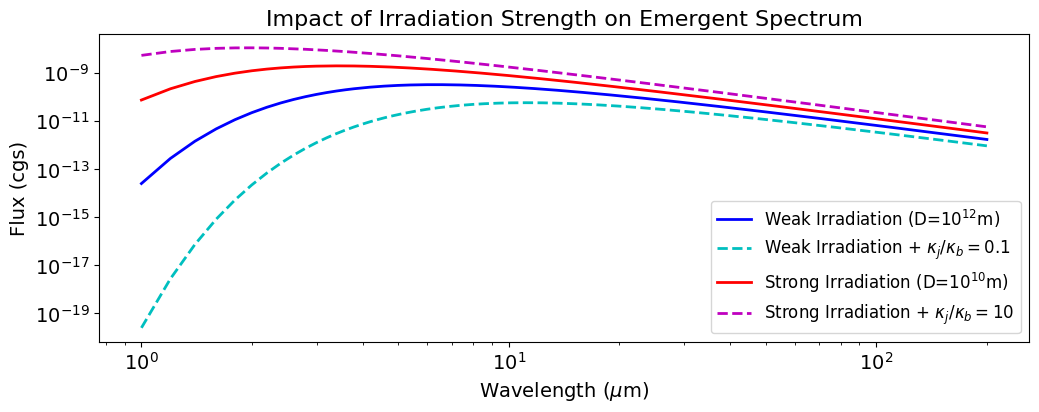

In [37]:
# looking at the impacts of strong irradiation

model_weak = GreyModel(Teff=1000, kappa_ratio=1, D=1e12, include_molecules=False)
model_weak_kappa = GreyModel(Teff=1000, kappa_ratio=0.1, D=1e12, include_molecules=False)
model_strong = GreyModel(Teff=1000, kappa_ratio=1, D=1e10, include_molecules=False)
model_strong_kappa = GreyModel(Teff=1000, kappa_ratio=10, D=1e10, include_molecules=False)

plt.figure(figsize=(12,4))
plt.loglog((c.c/model_weak.freqs).to_value(u.um), model_weak.final_spectrum, 'b-', linewidth=2, label='Weak Irradiation (D=$10^{12}$m)')
plt.loglog((c.c/model_weak_kappa.freqs).to_value(u.um), model_weak_kappa.final_spectrum, 'c--', linewidth=2, label='Weak Irradiation + $\\kappa_j/\\kappa_b=0.1$')
plt.loglog((c.c/model_strong.freqs).to_value(u.um), model_strong.final_spectrum, 'r-', linewidth=2, label='Strong Irradiation (D=$10^{10}$m)')
plt.loglog((c.c/model_strong_kappa.freqs).to_value(u.um), model_strong_kappa.final_spectrum, 'm--', linewidth=2, label='Strong Irradiation + $\\kappa_j/\\kappa_b=10$')
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
plt.ylabel('Flux (cgs)', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.title('Impact of Irradiation Strength on Emergent Spectrum', fontsize=title_fontsize)
#plt.xlim(0,50)
#plt.grid()
plt.show()

Found 3 molecular line data files:
  20251002055928__14N-1H3__144.0K.csv
  20251002055928__1H2-16O__144.0K.csv
  20251002055928__12C-1H4__144.0K.csv

Frequency grid: 10000 points from 1.5 THz to 119.9 THz

Calculating opacity for Water (H₂O)...
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 10000 points
[MolecularLines] Processing 1H2-16O...
[MolecularLines] 1H2-16O: Processing 500 lines...
[MolecularLines] 1H2-16O: Done processing 500 lines

Calculating opacity for Ammonia (NH₃)...
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 10000 points
[MolecularLines] Processing 14N-1H3...
[MolecularLines] 14N-1H3: Processing 500 lines...

Frequency grid: 10000 points from 1.5 THz to 119.9 THz

Calculating opacity for Water (H₂O)...
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 10000 points
[MolecularLines] Processing 1H2-1

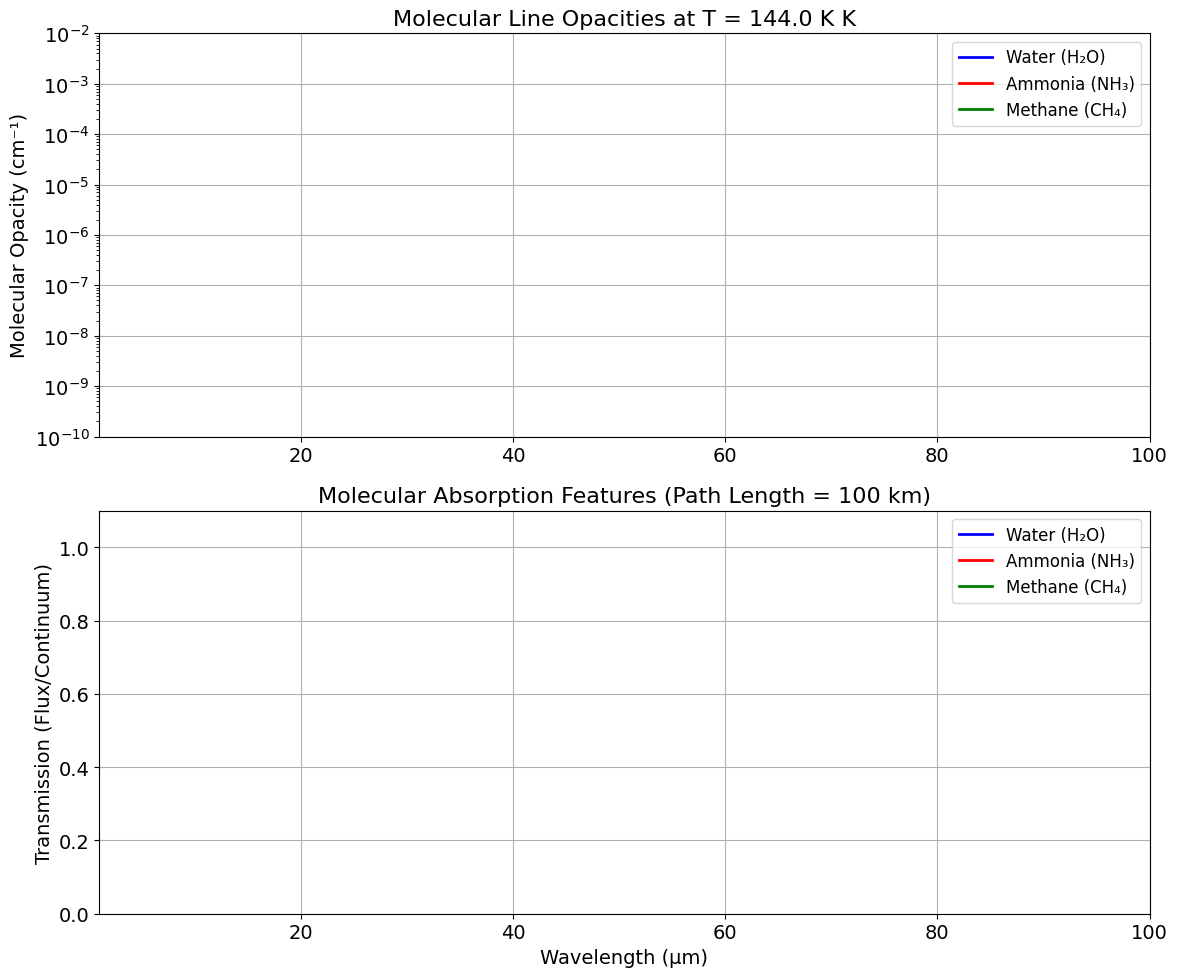


Plot completed showing molecular spectra for 3 molecules


In [ ]:
# Plot molecular line spectra
import numpy as np
from molecular_lines import MolecularLines
import glob
import os

# Find CSV files with molecular line data
csv_files = glob.glob('/Users/vernica/GitHub/project-10/grey_model/20251002055928/*.csv')
print(f"Found {len(csv_files)} molecular line data files:")
for f in csv_files:
    print(f"  {os.path.basename(f)}")

# Initialize molecular lines class
mol_lines = MolecularLines(csv_files)

# Set up conditions (typical for planetary atmosphere)
T = 144 * u.K  # K (temperature from your filenames)
P = 1e5  # dyne/cm^2 (1 bar)

# Define molecular abundances (number densities in cm^-3)
molecule_abundances = {
    '1H2-16O': 1e15 * u.cm**-4,   # Water
    '14N-1H3': 1e14 * u.cm**-4,   # Ammonia  
    '12C-1H4': 1e16 * u.cm**-6    # Methane
}

# Create frequency grid (convert from wavenumber range in data)
# Typical range for these molecules is ~50-4000 cm^-1
nu_min = 50 * u.cm**-1 * c.c  # Hz
nu_max = 4000 * u.cm**-1 * c.c  # Hz
nu_grid = np.logspace(np.log10(nu_min.value), np.log10(nu_max.value), 10000) * u.Hz

print(f"\nFrequency grid: {len(nu_grid)} points from {nu_min.to(u.THz):.1f} to {nu_max.to(u.THz):.1f}")

# Calculate molecular opacities for each molecule individually
colors = ['blue', 'red', 'green']
molecule_names = ['Water (H₂O)', 'Ammonia (NH₃)', 'Methane (CH₄)']
molecule_keys = ['1H2-16O', '14N-1H3', '12C-1H4']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Convert to wavelength for plotting
wavelength = (c.c / nu_grid).to(u.um)

for i, (mol_key, mol_name, color) in enumerate(zip(molecule_keys, molecule_names, colors)):
    # Create abundance dict for single molecule
    single_mol_abundance = {mol_key: molecule_abundances[mol_key]}
    
    print(f"\nCalculating opacity for {mol_name}...")
    
    # Calculate opacity (this returns opacity in cm^-1)
    opacity = mol_lines.compute_molecular_opacity(
        nu_grid.value, T, P, single_mol_abundance, max_lines=500
    )
    
    # Convert to absorption coefficient and then to optical depth
    # Assume a characteristic path length of 100 km for planetary atmosphere
    path_length = 100 * u.km
    optical_depth = opacity * u.cm**-1 * path_length.to(u.cm)
    
    # Calculate transmission spectrum (flux ratio relative to continuum)
    transmission = np.exp(-optical_depth.value)
    
    # Plot opacity
    ax1.semilogy(wavelength, opacity, color=color, linewidth=2, label=mol_name)
    
    # Plot transmission spectrum  
    ax2.plot(wavelength, transmission, color=color, linewidth=2, label=mol_name)

# Format plots
ax1.set_ylabel('Molecular Opacity (cm⁻¹)', fontsize=label_fontsize)
ax1.set_title(f'Molecular Line Opacities at T = {T} K', fontsize=title_fontsize)
ax1.legend(fontsize=legend_fontsize)
ax1.grid(True)
ax1.set_xlim(1, 100)  # Focus on infrared region
ax1.set_ylim(1e-10, 1e-2)

ax2.set_xlabel('Wavelength (μm)', fontsize=label_fontsize)
ax2.set_ylabel('Transmission (Flux/Continuum)', fontsize=label_fontsize)
ax2.set_title('Molecular Absorption Features (Path Length = 100 km)', fontsize=title_fontsize)
ax2.legend(fontsize=legend_fontsize)
ax2.grid(True)
ax2.set_xlim(1, 100)
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

print(f"\nPlot completed showing molecular spectra for {len(molecule_keys)} molecules")

Creating improved molecular spectra visualization...

Processing Near-IR range (1-5 μm)...
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 5000 points
[MolecularLines] Processing 1H2-16O...
[MolecularLines] 1H2-16O: Processing 1000 lines...
[MolecularLines] 1H2-16O: Done processing 1000 lines
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 5000 points
[MolecularLines] Processing 14N-1H3...
[MolecularLines] 14N-1H3: Processing 1000 lines...
[MolecularLines] 1H2-16O: Done processing 1000 lines
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 5000 points
[MolecularLines] Processing 14N-1H3...
[MolecularLines] 14N-1H3: Processing 1000 lines...
[MolecularLines] 14N-1H3: Done processing 1000 lines
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 5000 points
[MolecularLi

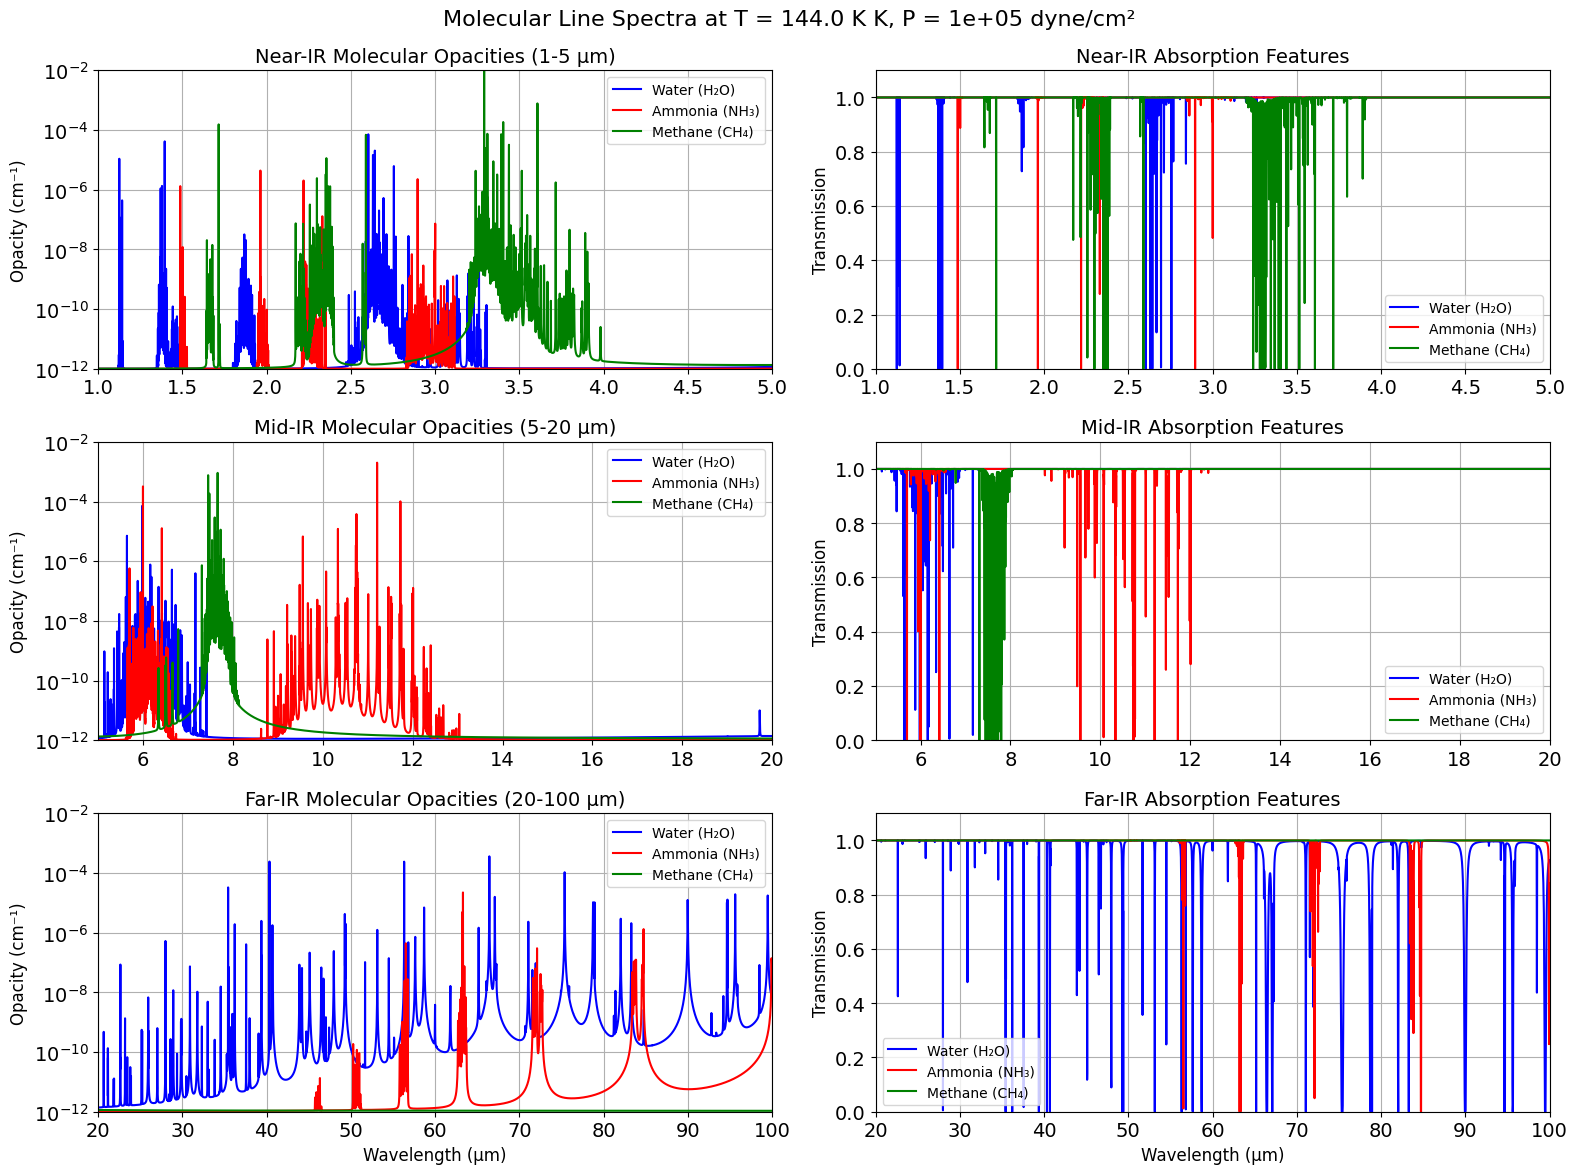


Completed molecular spectra visualization across 3 wavelength ranges


In [45]:
# Improved molecular spectra plot with better wavelength ranges and more lines
print("Creating improved molecular spectra visualization...")

# Create multiple wavelength ranges to show different molecular features
ranges = [
    {"name": "Near-IR", "wmin": 1, "wmax": 5, "max_lines": 1000},
    {"name": "Mid-IR", "wmin": 5, "wmax": 20, "max_lines": 1000}, 
    {"name": "Far-IR", "wmin": 20, "wmax": 100, "max_lines": 1000}
]

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for range_idx, wrange in enumerate(ranges):
    print(f"\nProcessing {wrange['name']} range ({wrange['wmin']}-{wrange['wmax']} μm)...")
    
    # Create frequency grid for this wavelength range
    lambda_min = wrange['wmin'] * u.um
    lambda_max = wrange['wmax'] * u.um
    nu_max_range = (c.c / lambda_min).to(u.Hz)
    nu_min_range = (c.c / lambda_max).to(u.Hz)
    
    nu_grid_range = np.logspace(
        np.log10(nu_min_range.value), 
        np.log10(nu_max_range.value), 
        5000
    ) * u.Hz
    
    wavelength_range = (c.c / nu_grid_range).to(u.um)
    
    # Plot individual molecule opacities
    ax_opacity = axes[range_idx * 2]
    ax_trans = axes[range_idx * 2 + 1]
    
    for i, (mol_key, mol_name, color) in enumerate(zip(molecule_keys, molecule_names, colors)):
        single_mol_abundance = {mol_key: molecule_abundances[mol_key]}
        
        opacity = mol_lines.compute_molecular_opacity(
            nu_grid_range.value, T, P, single_mol_abundance, 
            max_lines=wrange['max_lines']
        )
        
        # Calculate transmission
        path_length = 100 * u.km
        optical_depth = opacity * u.cm**-1 * path_length.to(u.cm)
        transmission = np.exp(-optical_depth.value)
        
        # Plot opacity
        if np.max(opacity) > 0:
            ax_opacity.semilogy(wavelength_range, opacity + 1e-12, 
                              color=color, linewidth=1.5, label=mol_name)
        
        # Plot transmission
        ax_trans.plot(wavelength_range, transmission, 
                     color=color, linewidth=1.5, label=mol_name)
    
    # Format opacity plot
    ax_opacity.set_ylabel('Opacity (cm⁻¹)', fontsize=12)
    ax_opacity.set_title(f'{wrange["name"]} Molecular Opacities ({wrange["wmin"]}-{wrange["wmax"]} μm)', 
                        fontsize=14)
    ax_opacity.legend(fontsize=10)
    ax_opacity.grid(True)
    ax_opacity.set_xlim(wrange['wmin'], wrange['wmax'])
    ax_opacity.set_ylim(1e-12, 1e-2)
    
    # Format transmission plot  
    ax_trans.set_ylabel('Transmission', fontsize=12)
    ax_trans.set_title(f'{wrange["name"]} Absorption Features', fontsize=14)
    ax_trans.legend(fontsize=10)
    ax_trans.grid(True)
    ax_trans.set_xlim(wrange['wmin'], wrange['wmax'])
    ax_trans.set_ylim(0, 1.1)
    
    if range_idx == 2:  # Bottom row
        ax_opacity.set_xlabel('Wavelength (μm)', fontsize=12)
        ax_trans.set_xlabel('Wavelength (μm)', fontsize=12)

plt.suptitle(f'Molecular Line Spectra at T = {T} K, P = {P:.0e} dyne/cm²', fontsize=16)
plt.tight_layout()
plt.show()

print(f"\nCompleted molecular spectra visualization across {len(ranges)} wavelength ranges")

Creating summary plot of key molecular absorption features...
Calculating combined molecular opacity...
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+05 dyne/cm^2
[MolecularLines] Frequency grid: 5000 points
[MolecularLines] Processing 14N-1H3...
[MolecularLines] 14N-1H3: Processing 2000 lines...
[MolecularLines] 14N-1H3: Done processing 2000 lines
[MolecularLines] Processing 1H2-16O...
[MolecularLines] 1H2-16O: Processing 2000 lines...
[MolecularLines] 14N-1H3: Done processing 2000 lines
[MolecularLines] Processing 1H2-16O...
[MolecularLines] 1H2-16O: Processing 2000 lines...
[MolecularLines] 1H2-16O: Done processing 2000 lines
[MolecularLines] Processing 12C-1H4...
[MolecularLines] 12C-1H4: Processing 2000 lines...
[MolecularLines] 1H2-16O: Done processing 2000 lines
[MolecularLines] Processing 12C-1H4...
[MolecularLines] 12C-1H4: Processing 2000 lines...
[MolecularLines] 12C-1H4: Done processing 2000 lines
Calculating opacity for Water (H₂O)...
[MolecularLines] Computin

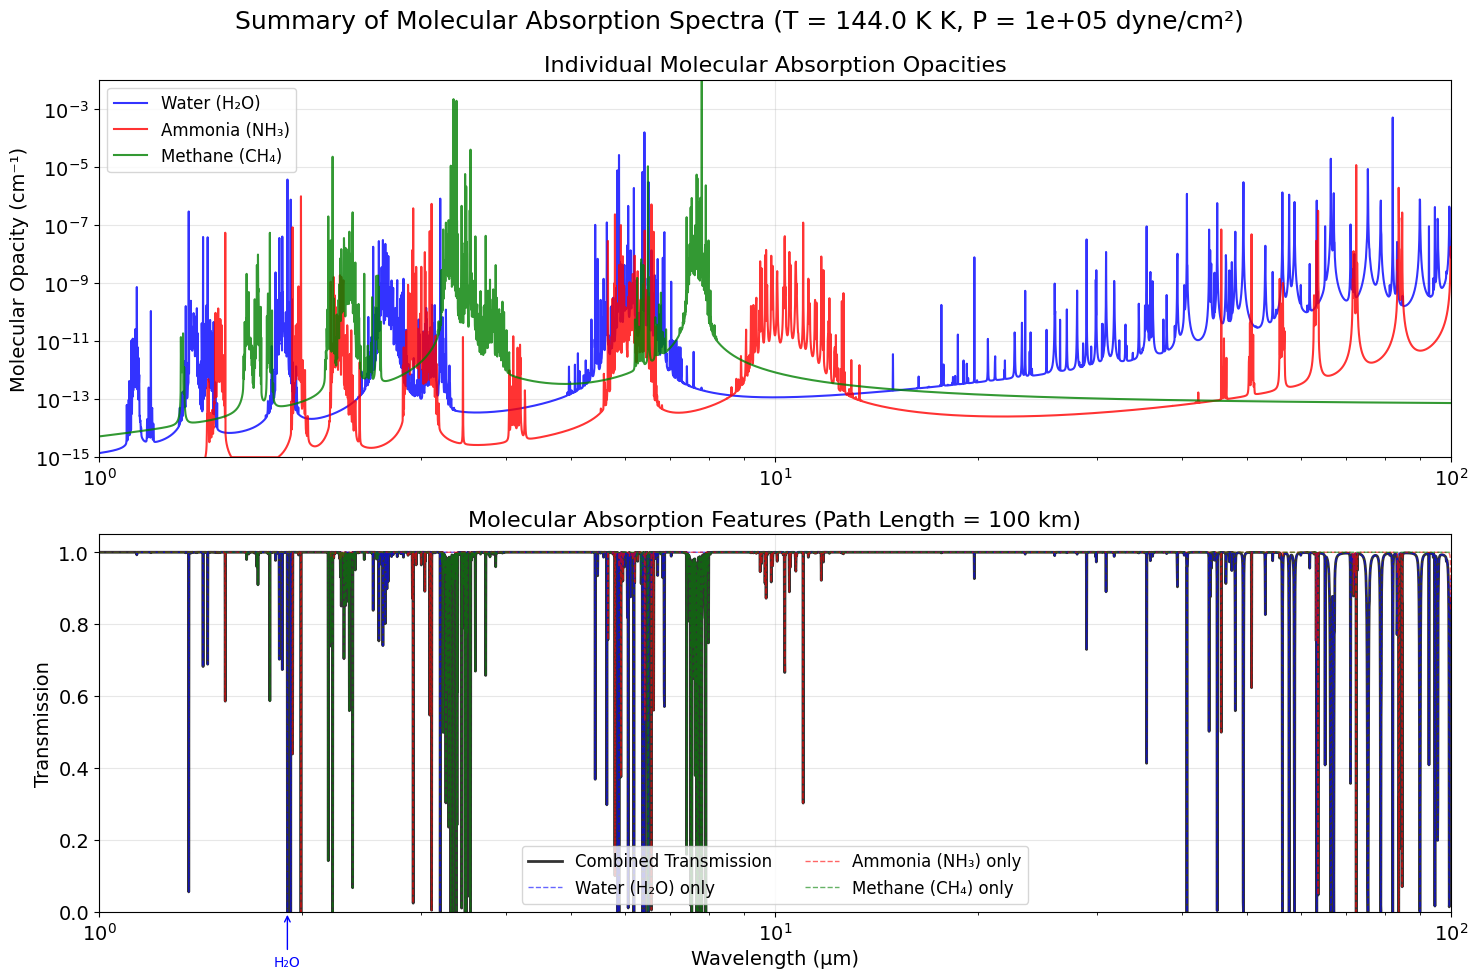

Molecular spectra summary completed!
Key absorption features identified across 1-100 μm wavelength range


In [46]:
# Summary plot showing key molecular absorption bands
print("Creating summary plot of key molecular absorption features...")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Create a broad wavelength grid covering 1-100 μm
lambda_grid = np.logspace(0, 2, 5000) * u.um  # 1 to 100 μm
nu_grid_broad = (c.c / lambda_grid).to(u.Hz)

# Calculate combined opacity from all molecules
print("Calculating combined molecular opacity...")
total_opacity = mol_lines.compute_molecular_opacity(
    nu_grid_broad.value, T, P, molecule_abundances, max_lines=2000
)

# Individual molecule contributions
individual_opacities = {}
for i, (mol_key, mol_name, color) in enumerate(zip(molecule_keys, molecule_names, colors)):
    print(f"Calculating opacity for {mol_name}...")
    single_mol_abundance = {mol_key: molecule_abundances[mol_key]}
    opacity = mol_lines.compute_molecular_opacity(
        nu_grid_broad.value, T, P, single_mol_abundance, max_lines=2000
    )
    individual_opacities[mol_key] = opacity

# Plot 1: Individual molecular opacities
for i, (mol_key, mol_name, color) in enumerate(zip(molecule_keys, molecule_names, colors)):
    opacity = individual_opacities[mol_key]
    mask = opacity > 1e-15  # Only plot where there's significant opacity
    if np.any(mask):
        ax1.loglog(lambda_grid[mask], opacity[mask], color=color, 
                    linewidth=1.5, label=mol_name, alpha=0.8)

ax1.set_ylabel('Molecular Opacity (cm⁻¹)', fontsize=14)
ax1.set_title('Individual Molecular Absorption Opacities', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, 100)
ax1.set_ylim(1e-15, 1e-2)

# Plot 2: Transmission spectrum (combined effect)
path_length = 100 * u.km
optical_depth_total = total_opacity * u.cm**-1 * path_length.to(u.cm)
transmission_total = np.exp(-optical_depth_total.value)

ax2.semilogx(lambda_grid, transmission_total, 'black', linewidth=2, 
         label='Combined Transmission', alpha=0.8)

# Add individual transmission curves
for i, (mol_key, mol_name, color) in enumerate(zip(molecule_keys, molecule_names, colors)):
    opacity = individual_opacities[mol_key]
    optical_depth = opacity * u.cm**-1 * path_length.to(u.cm)
    transmission = np.exp(-optical_depth.value)
    ax2.plot(lambda_grid, transmission, color=color, linewidth=1, 
             label=f'{mol_name} only', alpha=0.6, linestyle='--')

ax2.set_xlabel('Wavelength (μm)', fontsize=14)
ax2.set_ylabel('Transmission', fontsize=14)
ax2.set_title('Molecular Absorption Features (Path Length = 100 km)', fontsize=16)
ax2.legend(fontsize=12, ncol=2)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1, 100)
ax2.set_ylim(0, 1.05)

# Add text annotations for key absorption bands
absorption_bands = {
    'H₂O': [(1.4, 'H₂O'), (1.9, 'H₂O'), (2.7, 'H₂O'), (6.3, 'H₂O'), (20, 'H₂O rot.')],
    'NH₃': [(1.5, 'NH₃'), (2.0, 'NH₃'), (10.5, 'NH₃')],
    'CH₄': [(1.66, 'CH₄'), (2.3, 'CH₄'), (3.3, 'CH₄'), (7.7, 'CH₄')]
}

colors_dict = {'H₂O': 'blue', 'NH₃': 'red', 'CH₄': 'green'}
for molecule, bands in absorption_bands.items():
    for wavelength, label in bands:
        if 1 <= wavelength <= 100:
            # Find transmission at this wavelength
            idx = np.argmin(np.abs(lambda_grid.value - wavelength))
            trans_val = transmission_total[idx]
            if trans_val < 0.9:  # Only annotate if there's significant absorption
                ax2.annotate(label, xy=(wavelength, trans_val), 
                           xytext=(wavelength, trans_val-0.15),
                           fontsize=10, ha='center', color=colors_dict[molecule],
                           arrowprops=dict(arrowstyle='->', color=colors_dict[molecule], lw=1))

plt.suptitle(f'Summary of Molecular Absorption Spectra (T = {T} K, P = {P:.0e} dyne/cm²)', 
             fontsize=18)
plt.tight_layout()
plt.show()

print("Molecular spectra summary completed!")
print(f"Key absorption features identified across 1-100 μm wavelength range")